In [3226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

In [3227]:

train = pd.read_csv('datasets/train.csv')

In [3228]:
train.shape

(2051, 81)

In [3229]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3230]:
train_corr = train.corrwith(train['SalePrice']).sort_values(ascending=False)

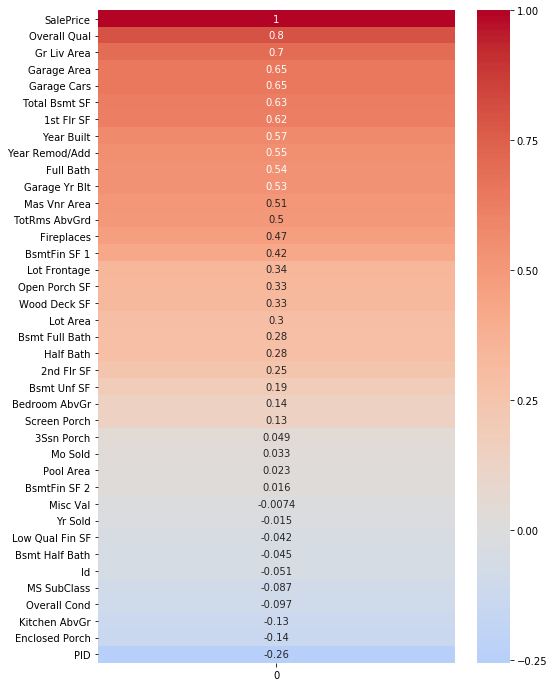

In [3231]:
train.corrwith(train['SalePrice']).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8,12))
sns.heatmap(train_corr.to_frame(), center=0, cmap='coolwarm', annot=True)

In [3232]:
features = ['Overall Qual', 'Gr Liv Area']
X_train = train[features]
y_train = train['SalePrice']

In [3233]:
ridge = Ridge()

ridge.fit(X_train,y_train)
ridgecoef = ridge.coef_
ridgeint = ridge.intercept_
print(ridgecoef, ridgeint)

[33157.45255806    56.84151614] -106417.49947756075


In [3234]:
test = pd.read_csv('datasets/test.csv')

In [3235]:
test.shape

(879, 80)

In [3236]:
X_test = test[features]

In [3237]:
predictions = ridge.predict(X_test)


In [3238]:
cross_val_score(ridge, X_train, y_train, cv = 3).mean()

0.7258126457851541

In [3239]:
predictions.shape

(879,)

In [3240]:
test['SalePrice'] = predictions

In [3241]:
submission = test[['Id','SalePrice']]
submission.to_csv('j_ames_11_30.csv', index=False)

-----

-----

In [3242]:
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score

train = pd.read_csv('datasets/train.csv')

In [3243]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3244]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [3245]:
def descriptive_to_numbers(column):
    columnnona = column.fillna('NA')
    numbered = columnnona.map({'Ex':15,'Gd':10,'TA':7,'Fa':5,'Po':3,'NA':0})
    
    return numbered

def descriptive_to_numbers_no_po(column):
    columnnona = column.fillna('NA')
    numbered = columnnona.map({'Ex':15,'Gd':10,'TA':7,'Fa':5,'NA':0})
    
    return numbered

def basement_to_numbers(column):
    columnnona = column.fillna('NA')
    numbered = columnnona.map({'GLQ':18,'ALQ':13,'BLQ':10,'Rec':9,'LwQ':5,'Unf':3,'NA':0})
    
    return numbered



In [3246]:
def changes_to_dataframe(df):
    df['Basement + Liv Area'] = df['Total Bsmt SF'] + df['Gr Liv Area']
    df['Exter Qual'] = descriptive_to_numbers(df['Exter Qual'])
    df['Exter Cond'] = descriptive_to_numbers(df['Exter Cond'])
    df['Bsmt Cond'] = descriptive_to_numbers(df['Bsmt Cond'])
    df['Bsmt Qual'] = descriptive_to_numbers(df['Bsmt Qual'])
    df['Heating QC'] = descriptive_to_numbers(df['Heating QC'])
    df['Kitchen Qual'] = descriptive_to_numbers(df['Kitchen Qual'])
    df['Fireplace Qu'] = descriptive_to_numbers(df['Fireplace Qu'])
    df['Garage Qual'] = descriptive_to_numbers(df['Garage Qual'])
    df['Garage Cond'] = descriptive_to_numbers(df['Garage Cond'])
    df['Pool QC'] = descriptive_to_numbers_no_po(df['Pool QC'])
    df['BsmtFin Type 1'] = basement_to_numbers(df['BsmtFin Type 1'])
    df['BsmtFin Type 2'] = basement_to_numbers(df['BsmtFin Type 2'])
    df['Multiple Basement Score'] = df['BsmtFin Type 1'] + df['BsmtFin Type 2']
    df['Garage Area'] = df['Garage Area'].fillna(0)
    df['Garage Cars'] = df['Garage Cars'].fillna(0)
    df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0)
    df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])
    df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
    df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(0)        #Filling an NA in BsmtFin SF 1 that has no basement so no SF
    df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(0)        #Filling an NA in Bsmt Unf SF that has no basement so no SF
    df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())        #Filling an NA in Lot Frontage with average frontage
    df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0)       #Filling an NA in Bsmt Full Bath that has no basement so no SF
    df['Total Number Of Bathrooms Scaled'] = df['Bsmt Full Bath'] + df['Bsmt Half Bath']*.5 + df['Full Bath'] + df['Half Bath']*.5
    df['Total Number Of Bathrooms Scaled'] = df['Total Number Of Bathrooms Scaled'].fillna(0)
    df = pd.concat([df,pd.get_dummies(df['Misc Feature'])], axis = 1)
    df = pd.concat([df,pd.get_dummies(df['Neighborhood'])], axis = 1)
    df = pd.concat([df,pd.get_dummies(df['Functional'])], axis = 1)
    df = pd.concat([df,pd.get_dummies(df['Garage Finish'])], axis = 1)
    df = pd.concat([df,pd.get_dummies(df['Lot Config'])], axis = 1)
    df = pd.concat([df,pd.get_dummies(df['Land Slope'])], axis = 1)
    df = pd.concat([df,pd.get_dummies(df['Condition 1'])], axis = 1)
    return df



In [3247]:
changes_to_dataframe(train).head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Sev,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,109,533352170,60,RL,69.0552,13517,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,1,0,0,0
1,544,531379050,60,RL,43.0000,11492,Pave,NaN,IR1,Lvl,...,0,0,0,1,0,0,0,0,0,0
2,153,535304180,20,RL,68.0000,7922,Pave,NaN,Reg,Lvl,...,0,0,0,1,0,0,0,0,0,0
3,318,916386060,60,RL,73.0000,9802,Pave,NaN,Reg,Lvl,...,0,0,0,1,0,0,0,0,0,0
4,255,906425045,50,RL,82.0000,14235,Pave,NaN,IR1,Lvl,...,0,0,0,1,0,0,0,0,0,0


In [3248]:
avg_price_per_neigh = train['SalePrice'].groupby(train['Neighborhood']).mean().sort_values()
avg_price_per_neigh

Neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: SalePrice, dtype: float64

In [3249]:
neigh_keys = avg_price_per_neigh.keys()
neigh_keys[0]

'MeadowV'

In [3250]:
price_values = avg_price_per_neigh.values
price_values[0]

100231.25

In [3251]:
avg_cost_per_neigh = {}
for x in range(0,28):
    avg_cost_per_neigh[neigh_keys[x]] = price_values[x]

In [3252]:
avg_cost_per_neigh

{'MeadowV': 100231.25,
 'IDOTRR': 101103.1884057971,
 'BrDale': 103371.05263157895,
 'OldTown': 125276.30061349693,
 'BrkSide': 127022.69736842105,
 'Edwards': 130493.46853146853,
 'SWISU': 134758.875,
 'Landmrk': 137000.0,
 'Sawyer': 137181.9099099099,
 'NPkVill': 140476.4705882353,
 'Blueste': 144566.66666666666,
 'NAmes': 145905.81612903226,
 'Mitchel': 167656.70731707316,
 'SawyerW': 187760.16091954024,
 'Greens': 188666.66666666666,
 'Gilbert': 189228.3879310345,
 'NWAmes': 194619.02298850575,
 'Blmngtn': 200417.68181818182,
 'CollgCr': 202497.21666666667,
 'Crawfor': 205901.21126760563,
 'ClearCr': 217490.07407407407,
 'Somerst': 227183.9,
 'Timber': 241051.35416666666,
 'Veenker': 253570.58823529413,
 'GrnHill': 280000.0,
 'NoRidge': 316294.125,
 'NridgHt': 322831.3524590164,
 'StoneBr': 329675.7368421053}

In [3253]:
train['NeighborhoodAvgCostPerHouse'] = train['Neighborhood']
train['NeighborhoodAvgCostPerHouse'] = train['NeighborhoodAvgCostPerHouse'].map(avg_cost_per_neigh)

In [3254]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Basement + Liv Area,Multiple Basement Score,Total Number Of Bathrooms Scaled,NeighborhoodAvgCostPerHouse
0,109,533352170,60,RL,69.0552,13517,Pave,NaN,IR1,Lvl,...,NaN,0,3,2010,WD,130500,2204.0,21,2.5,137181.909910
1,544,531379050,60,RL,43.0000,11492,Pave,NaN,IR1,Lvl,...,NaN,0,4,2009,WD,220000,3035.0,21,3.5,187760.160920
2,153,535304180,20,RL,68.0000,7922,Pave,NaN,Reg,Lvl,...,NaN,0,1,2010,WD,109000,2114.0,21,2.0,145905.816129
3,318,916386060,60,RL,73.0000,9802,Pave,NaN,Reg,Lvl,...,NaN,0,4,2010,WD,174000,1828.0,6,2.5,241051.354167
4,255,906425045,50,RL,82.0000,14235,Pave,NaN,IR1,Lvl,...,NaN,0,3,2010,WD,138500,2121.0,6,2.0,187760.160920


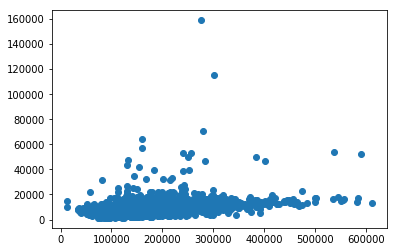

In [3255]:
plt.scatter(train['SalePrice'],train['Lot Area'])

In [3256]:
train['SalePrice'].sort_values().head()

1628    12789
183     13100
1309    34900
1292    35000
1518    35311
Name: SalePrice, dtype: int64

In [3257]:
train['Lot Area'].sort_values().tail()

745      57200
960      63887
1854     70761
694     115149
471     159000
Name: Lot Area, dtype: int64

In [3258]:
test[test['Lot Area']> 100000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
214,957,916176125,20,RL,150.0,215245,Pave,NaN,IR3,Low,...,0,0,NaN,NaN,NaN,0,6,2009,WD,241413.995289
307,1571,916125425,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,...,0,0,NaN,NaN,Shed,700,8,2008,WD,160888.711138


In [3259]:
train.loc[307,'Gr Liv Area']

1312

In [3260]:
train['Basement + Liv Area'] = train['Total Bsmt SF'] + train['Gr Liv Area']

In [3261]:
train['Gr Liv Area'].sort_values(ascending=False).head()

960     5642
1885    5095
616     3820
1897    3672
1035    3608
Name: Gr Liv Area, dtype: int64

In [3262]:
train['Exter Cond'].head()

0     7
1     7
2    10
3     7
4     7
Name: Exter Cond, dtype: int64

In [3263]:
train = train.drop(960)
train = train.drop(1885)
train = train.drop(471)
train = train.drop(964)

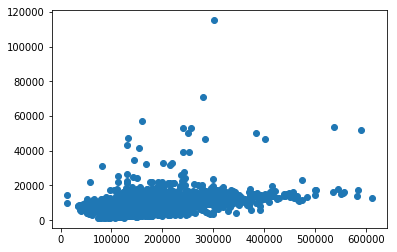

In [3153]:
plt.scatter(train['SalePrice'],train['Lot Area'])

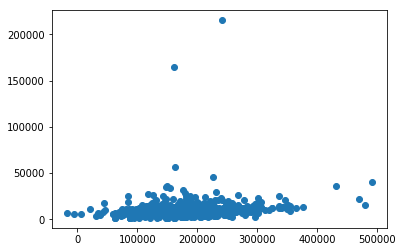

In [3154]:
plt.scatter(test['SalePrice'],test['Lot Area'])

IQR = Q3 - Q1

3 * ( Q1 - IQR) and 3 * ( Q3 + IQR)

In [3069]:
Q1 = 129825.00    #25% from the .describe() we used earlier
Q3 = 214000.00    #75% from the .describe() we used earlier

IQR = Q3 - Q1

lower_bound = Q1 - 4* IQR 
upper_bound = Q3 + 4* IQR 

print(f'Lower bound is: {lower_bound}')
print(f'Upper bound is: {upper_bound}')


Lower bound is: -206875.0
Upper bound is: 550700.0


In [3072]:
train['Low Qual Fin SF'].value_counts()

0       2016
80         3
205        2
436        1
108        1
114        1
120        1
140        1
144        1
156        1
234        1
312        1
360        1
362        1
384        1
390        1
697        1
515        1
512        1
514        1
528        1
572        1
1064       1
53         1
259        1
371        1
397        1
473        1
479        1
513        1
450        1
Name: Low Qual Fin SF, dtype: int64

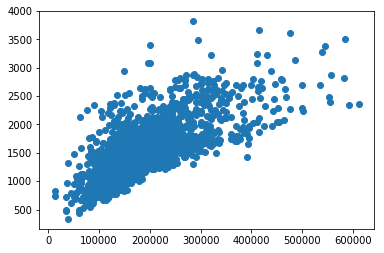

In [3030]:
plt.scatter(train['SalePrice'],train['Gr Liv Area'])

In [ ]:
train['MS Zoning']

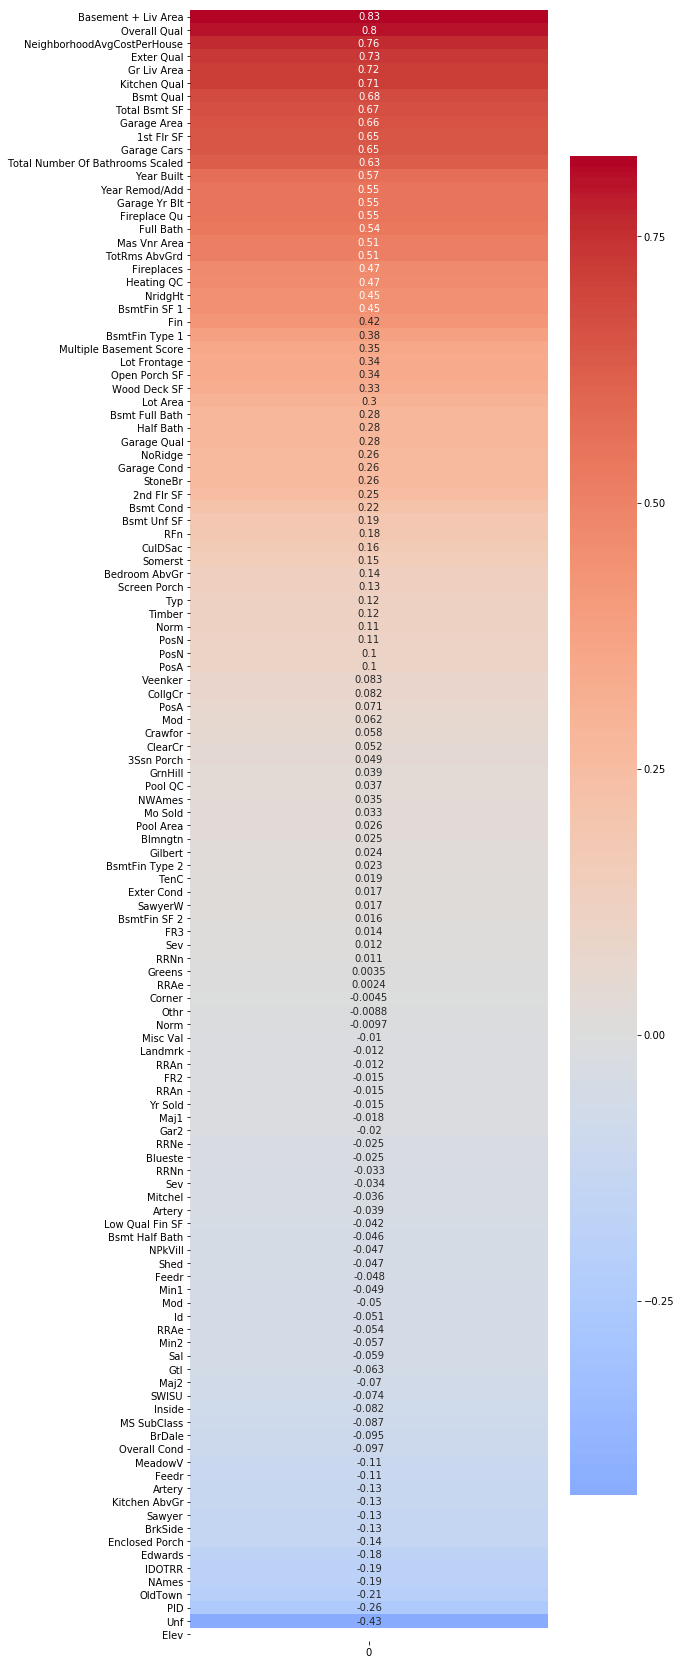

In [3031]:
train_corr = train.corrwith(train['SalePrice']).sort_values(ascending=False)[1:]
train.corrwith(train['SalePrice']).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8,30))
sns.heatmap(train_corr.to_frame(), center=0, cmap='coolwarm', annot=True)

In [3067]:
train_corr_abs = abs(train_corr).sort_values(ascending = False)
train_corr_abs

Basement + Liv Area                 0.825818
Overall Qual                        0.803462
NeighborhoodAvgCostPerHouse         0.760830
Exter Qual                          0.728491
Gr Liv Area                         0.719463
Kitchen Qual                        0.713239
Bsmt Qual                           0.679112
Total Bsmt SF                       0.665116
Garage Area                         0.655097
1st Flr SF                          0.648252
Garage Cars                         0.648227
Total Number Of Bathrooms Scaled    0.628973
Year Built                          0.572405
Year Remod/Add                      0.550872
Garage Yr Blt                       0.550829
Fireplace Qu                        0.546424
Full Bath                           0.538225
Mas Vnr Area                        0.511273
TotRms AbvGrd                       0.509775
Fireplaces                          0.473783
Heating QC                          0.465912
NridgHt                             0.448639
BsmtFin SF

In [3033]:
train[list(train_corr_abs.index[0:50])].isnull().sum()

Basement + Liv Area                 0
Overall Qual                        0
NeighborhoodAvgCostPerHouse         0
Exter Qual                          0
Gr Liv Area                         0
Kitchen Qual                        0
Bsmt Qual                           0
Total Bsmt SF                       0
Garage Area                         0
1st Flr SF                          0
Garage Cars                         0
Total Number Of Bathrooms Scaled    0
Year Built                          0
Year Remod/Add                      0
Garage Yr Blt                       0
Fireplace Qu                        0
Full Bath                           0
Mas Vnr Area                        0
TotRms AbvGrd                       0
Fireplaces                          0
Heating QC                          0
NridgHt                             0
BsmtFin SF 1                        0
Unf                                 0
Fin                                 0
BsmtFin Type 1                      0
Multiple Bas

In [3034]:
features = list(train_corr_abs.index[0:30])
X = train[features]
y = train['SalePrice']

## Model Prep: Train/test split

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [3035]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Model Prep: Scaling

Since we're using `Lasso` and `Ridge`, we'll want to scale our features. In the cell below, fit a `StandardScaler` to `X_train` and use it to transform both `X_train` and `X_test`.

In [3036]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [3037]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## Model Prep: Instantiate our models

We'll be evaluating `LinearRegression`, `LassoCV` and `RidgeCV`, so we'll need to create instances of all three models.

In [3038]:
lr = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()

In [3039]:
ridge = RidgeCV()
ridge.fit(X_train_sc, y_train_log)
r_alpha = ridge.alpha_
r_alpha

10.0

In [3040]:
lasso = LassoCV()
lasso.fit(X_train_sc, y_train_log)
l_alpha = lasso.alpha_
l_alpha

0.0023738068212538154

In [3041]:
lr_scores = cross_val_score(lr, X_train_sc, y_train_log, cv=5).mean()
lasso_scores = cross_val_score(Lasso(alpha=l_alpha), X_train_sc, y_train_log, cv=5).mean()
ridge_scores = cross_val_score(Ridge(alpha=r_alpha), X_train_sc, y_train_log, cv=5).mean()

print(f'Linear Regresion CV Score: {lr_scores}')
print(f'Lasso CV Score: {lasso_scores}')
print(f'Ridge CV Score: {ridge_scores}')

Linear Regresion CV Score: 0.8851009368570175
Lasso CV Score: 0.8857904895388486
Ridge CV Score: 0.885296459443069


In [3042]:
lr.fit(X_train_sc, y_train_log)
lasso.fit(X_train_sc, y_train_log)
ridge.fit(X_train_sc, y_train_log)

lr_predict = np.exp(lr.predict(X_test_sc))
lasso_predict = np.exp(lasso.predict(X_test_sc))
ridge_predict = np.exp(ridge.predict(X_test_sc))



lr_r2 = r2_score(y_test, lr_predict)
lasso_r2 = r2_score(y_test, lasso_predict)
ridge_r2 = r2_score(y_test, ridge_predict)

print(f'Linear Regresion R2: {lr_r2}')
print(f'Lasso R2 Score: {lasso_r2}')
print(f'Ridge R2 Score: {ridge_r2}')

Linear Regresion R2: 0.9032926256968928
Lasso R2 Score: 0.9048290897721138
Ridge R2 Score: 0.9036219733845848


In [3043]:
residuals = y_test - ridge_predict

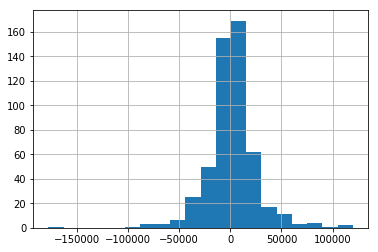

In [3044]:
residuals.hist(bins=20)

## Reset X and y
----

In [3045]:
X, y

(      Basement + Liv Area  Overall Qual  NeighborhoodAvgCostPerHouse  \
 0                  2204.0             6                137181.909910   
 1                  3035.0             7                187760.160920   
 2                  2114.0             5                145905.816129   
 3                  1828.0             5                241051.354167   
 4                  2121.0             6                187760.160920   
 5                  3405.0             6                145905.816129   
 6                  1619.0             6                130493.468531   
 7                  2376.0             5                145905.816129   
 8                  1848.0             5                125276.300613   
 9                  3120.0             5                145905.816129   
 10                 1470.0             6                103371.052632   
 11                 2416.0             7                202497.216667   
 12                 2016.0             5           

In [3046]:
y_log = np.log(y)

X_sc = ss.transform(X)

In [3047]:
ridge = RidgeCV()


In [3048]:
ridge_scores = cross_val_score(Ridge(), X_sc, y_log, cv=5).mean()
ridge_scores

0.8821605882842902

In [3049]:
ridge_model = ridge.fit(X_sc, y_log)

In [3050]:
l_alphas = np.arange(0.15,1,0.01)
lasso_model = LassoCV(alphas=l_alphas)
lasso_model = lasso.fit(X_sc, y_log)


In [3051]:
best_alpha = lasso_model.alpha_
best_alpha

0.0007827154262683688

In [3052]:
lasso_model.score(X_sc,y_log)

0.884760579351349

In [3053]:
ridge_model.score(X_sc,y_log)

0.8849827626417506

## Submitting Our Model

----

In [3054]:
test = pd.read_csv('datasets/test.csv')

In [3264]:
test

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,202117.658988
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,171177.025560
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,210719.576574
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,114392.350936
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,171764.289370
5,333,923228370,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,88283.246379
6,1327,902427150,20,RM,52.0,8516,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2008,WD,88340.087895
7,858,907202130,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,10,2009,WD,131444.805778
8,95,533208090,160,FV,39.0,3515,Pave,Pave,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,221178.415544
9,1568,914476010,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,2,2008,WD,165227.515013


In [3055]:
changes_to_dataframe(test)

In [3056]:
test = pd.concat([test,pd.get_dummies(test['Misc Feature'])], axis = 1)
test = pd.concat([test,pd.get_dummies(test['Neighborhood'])], axis = 1)
test = pd.concat([test,pd.get_dummies(test['Functional'])], axis = 1)
test = pd.concat([test,pd.get_dummies(test['Garage Finish'])], axis = 1)
test = pd.concat([test,pd.get_dummies(test['Lot Config'])], axis = 1)
test = pd.concat([test,pd.get_dummies(test['Land Slope'])], axis = 1)
test = pd.concat([test,pd.get_dummies(test['Condition 1'])], axis = 1)
test = pd.concat([test,pd.get_dummies(test['Condition 2'])], axis = 1)

In [3057]:
test['NeighborhoodAvgCostPerHouse'] = test['Neighborhood']
test['NeighborhoodAvgCostPerHouse'] = test['NeighborhoodAvgCostPerHouse'].map(avg_cost_per_neigh)

In [3058]:
X_actual_test = test[features]

In [3059]:
X_actual_test_sc = ss.transform(X_actual_test)

In [3060]:
predictions = np.exp(ridge_model.predict(X_actual_test_sc))

In [3061]:
test['SalePrice'] = predictions

In [3062]:
submission = test[['Id','SalePrice']]

In [3063]:
submission.head()

,Id,SalePrice
0,2658,129908.596025
1,2718,165012.976181
2,2414,197151.761994
3,1989,109898.034773
4,625,167110.038314


In [3065]:
#submission.to_csv('javier_ames_12_04_10.csv', index=False)